In [1]:
import numpy as np
import os
from datetime import datetime
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def date_structure(d):
    date_format = "%Y%m%d"
    #print(d)
    return datetime.strptime(d, date_format)
    

In [3]:
people = {}

In [4]:
max_index = 0;
for root, dirs, files in os.walk("../week3/"):
    for _dir in dirs:
        if(_dir.isnumeric()):
            dir_name = os.path.join(root, _dir);
            min_date = 99999999;
            max_date = 0;
            for f in os.listdir(dir_name):
                f = f.replace('.txt','')
                tokens = f.split('_')
                for token in tokens:
                    if(len(token) == 8 and token.isnumeric()):
                        date = int(token)
                        if(date < min_date):
                            min_date = date;
                        if(date > max_date):
                            max_date = date;
            contents = {'lift span': -1}
            if(min_date != 99999999 and max_date!=0):
                r_date = date_structure(str(max_date))
                l_date = date_structure(str(min_date))
                #print(r_date)
                #print(l_date)
                contents = {'life span':(r_date - l_date).days}

            people[_dir] = contents;
        #print(_dir)
        #print(people[_dir]['life span'])
        #input("")

In [5]:
x = []
y = []
for i in people:
    x.append(int(i))
    #print(str(i+1))
    y.append(people[i]['life span'])

## patient id and life span

Text(0, 0.5, 'life span')

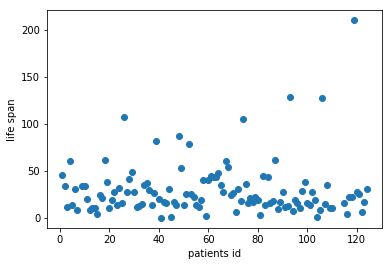

In [6]:

plt.scatter(x,y)
plt.xlabel('patients id')
plt.ylabel('life span')

In [7]:

with open("../week4/medicines_dict.json") as f:
    medicines_dict = json.load(f) 

with open("../week4/medicines_abb_map.json") as f:
    medicines_abb_map = json.load(f) 

In [8]:

for root, dirs, files in os.walk("../week3/"):
    for _dir in dirs:
        max_med_ct = 0;
        max_med = '';
        patient_medicine_map = {}
        if(_dir.isnumeric()):
            dir_name = os.path.join(root, _dir);
            for f in os.listdir(dir_name):
                if(f.find('ipynb') == -1):
                    file_name = os.path.join(dir_name , f)
                    f = open(file_name, "r")
                    contents =f.read()
                    for med in medicines_dict:
                        #print(med)
                        #print(medicines_dict[med])
                        if(contents.find(med)!=-1):
                            medicines_dict[med] += 1;
                            if med not in patient_medicine_map:
                                patient_medicine_map[med] = 1;
                            else:
                                patient_medicine_map[med] += 1
                                if(patient_medicine_map[med] > max_med_ct):
                                    max_med = med
                                    max_med_ct = patient_medicine_map[med]
            if(max_med == ''):
                people[_dir]['frequent medicine'] = 'None'
            else:
                people[_dir]['frequent medicine'] = max_med
                


##  藥名出現次數

([<matplotlib.patches.Wedge at 0x7f3294659470>,
 [Text(2.2, 0.0, 'EG\xa0abb'),
  Text(2.1999639292426294, 0.01259801696030149, 'ABG'),
  Text(2.1998205019079182, 0.028102657980956732, 'ACE'),
  Text(2.199631151930409, 0.040283935474372715, 'ACTH'),
  Text(2.1994292156782547, 0.05011112871348097, 'ADH'),
  Text(2.1991529228129942, 0.061044427125368755, 'AED'),
  Text(2.198840328653864, 0.07142274907456918, 'AIDS'),
  Text(2.1985043853757817, 0.08110775230184282, 'ALP'),
  Text(2.1967265617218206, 0.11996838344259694, 'ALT'),
  Text(2.1949024625097433, 0.14967691895768925, 'ASA'),
  Text(2.1935305384404997, 0.1685935257622086, 'AST'),
  Text(2.19204271160192, 0.1869458491459551, 'ATP'),
  Text(2.19204271160192, 0.1869458491459551, 'BCG'),
  Text(2.1902977193112605, 0.20638774377344227, 'bid'),
  Text(2.188380294355192, 0.22581339038658294, 'BIBPD'),
  Text(2.188380294355192, 0.22581339038658294, 'BLS'),
  Text(2.188380294355192, 0.22581339038658294, 'BMR'),
  Text(2.1737353613526222, 0.3

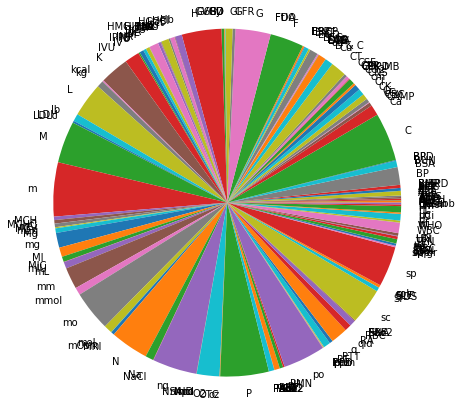

In [9]:
from collections import Counter
counts = Counter(medicines_dict)
plt.pie([int(v) for v in counts.values()], labels=[k for k in counts],
           autopct=None, radius = 2)

## 最常出現藥名 

In [10]:
print(max(medicines_dict, key=lambda key: medicines_abb_map[key]))

mol


In [11]:
import collections
people_or = collections.OrderedDict(sorted(people.items()))
#print(people)
pd.DataFrame.from_dict({(i): people_or[i]
                           for i in people_or.keys() },
                       orient='index')

,life span,frequent medicine
1,46,H
10,34,m
100,16,C
101,14,C
102,27,po
103,19,m
104,1,F
105,8,C
106,127,m
107,15,F


In [12]:
med_ct = {}
for i in people:
    print(i)
    if i['life span'] > 31:
        med_ct[i['frequent medicine']] = i['life span']


110


TypeError: string indices must be integers